In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
with open('./cache/memo_apr10_zipf_num_heads_8_num_layers_12_resample/memo_apr10_zipf_num_heads_8_num_layers_12_resample_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1744325270.2539148.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()



In [7]:
plt.plot([i['train_loss'] for i in data['logs']][:100])
plt.plot([i['train_loss'] for i in data['logs']][100:])

In [12]:
for i in data['logs']:
    if i['test_metrics'] != {}:
        print(i['test_metrics']["logsoftmaxloss"])

# Apr 18

In [106]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
with open('./cache/memo_apr10_zipf_num_heads_24_num_layers_36_resample_lr_1e-4/memo_apr10_zipf_num_heads_24_num_layers_36_resample_lr_1e-4_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1744954785.908804.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()

In [107]:
loss_per_appearance = [i["loss_per_appearance"] for i in data["logs"]] # list of list of arrays
appearances = [i["appearances"] for i in data["logs"]] # list of list of arrays
time_per_batch = []
for epoch, batch in enumerate(data["logs"]):
    time_per_batch.append([])
    num_batches = len(batch["appearances"])
    for i, batch_id in enumerate(batch["appearances"]):
        time_per_batch[epoch].append(epoch * num_batches + (i) )
        

In [108]:
print("time, appearance, loss", len(time_per_batch[0]), len(appearances[0]), len(loss_per_appearance[0]))
ranks_to_plot = [0, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
rank_times = defaultdict(list)
rank_losses = defaultdict(list)
num_appearances = defaultdict(float)
rank_appearances = defaultdict(list)
# loop through each epoch
for t, a, l in zip(time_per_batch, appearances, loss_per_appearance):
    # loop through each batch
    for i in range(len(t)):
        # loop through each rank
        for rank in range(len(ranks_to_plot)):
            # print("rank", ranks_to_plot[rank], "time", t[i], "loss", l[i][np.where(a[i] == ranks_to_plot[rank])].mean())
            rank_times[ranks_to_plot[rank]].append(t[i])
            rank_losses[ranks_to_plot[rank]].append(l[i][np.where(a[i] == ranks_to_plot[rank])].mean())
            n = np.sum(a[i] == ranks_to_plot[rank])
            if n > 0:
                num_appearances[ranks_to_plot[rank]] += n
            rank_appearances[ranks_to_plot[rank]].append(num_appearances[ranks_to_plot[rank]])
    
    


In [109]:
import matplotlib.colors as mcolors
markers = ["o", "s", "D", "P", "X", "v", "^", "<", ">"]
from matplotlib.colors import Normalize

def numbers_to_viridis_colors(numbers, vmin, vmax):
    """
    Convert a list of real numbers to colors using the viridis colormap.
    
    Args:
        numbers (list or numpy.ndarray): List of real numbers to convert to colors
        
    Returns:
        list: List of RGB colors in the format (r, g, b) where each component is between 0 and 1
    """
    # Convert input to numpy array if it's not already
    numbers = np.array(numbers)
    
    # Create a normalizer to map the numbers to [0, 1] range
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    # Get the viridis colormap
    cmap = plt.cm.viridis
    
    # Convert numbers to colors
    colors = cmap(norm(numbers))
    
    # Return list of RGB colors (excluding alpha channel)
    return colors[:, :3].tolist()
colormin = np.log10(min(np.concatenate(list(rank_appearances.values())))+1)
colormax = np.log10(max(np.concatenate(list(rank_appearances.values())))+1)
print("colormin", colormin, "colormax", colormax)
for i, rank in enumerate(ranks_to_plot):
    # print("rank_appearances",  numbers_to_viridis_colors(np.log(np.array(rank_appearances[rank])+1), colormin, colormax))
    scatter = plt.scatter(rank_times[rank], rank_losses[rank], 
                        #   c=numbers_to_viridis_colors(np.log(np.array(rank_appearances[rank])+1), colormin, colormax),
                        c = np.log10(np.array(rank_appearances[rank])+1),
                          norm = mcolors.Normalize(vmin=colormin, vmax=colormax),
                label=f"rank {rank}", s=2, marker=markers[i])
    
    cb = plt.colorbar()
    plt.legend()
    plt.show()

## Forgetting

In [37]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
# with open('./cache/memo_apr6_zipf_num_heads_8_num_layers_12_forget/memo_apr6_zipf_num_heads_8_num_layers_12_forget_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1745001737.7764006.pkl', 'rb') as f:
with open('./cache/memo_apr6_zipf_num_heads_24_num_layers_36_lr_1e-4_forget/memo_apr6_zipf_num_heads_24_num_layers_36_lr_1e-4_forget_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1745000344.072605.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()

In [43]:
test_epoch = np.stack([i["test_metrics"]["logsoftmaxloss"] for i in data["logs"]]) # list of list of arrays
print(test_epoch.shape)
for i in [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]:
    rank0 = (i+300) % 2000
    rank1 = (i+500) % 2000
    spacing = 50
    switch_epoch = (i+20) // 2000
    plt.plot(test_epoch[:,i+rank0], marker="o", markersize=1, linewidth=0.5, label=f"rank {rank0 * spacing}, switch {switch_epoch}")
    plt.plot(test_epoch[:,i+rank1], marker="o", markersize=1, linewidth=0.5, label=f"rank {rank1 * spacing}, switch {switch_epoch}")
plt.title("Forgetting: loss vs. rank \n Model: 24 heads, 36 layers, lr=1e-4")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc=(1.1,0))
plt.show()

# May 11

In [3]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
# fname = './cache/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754.pkl'
# fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283.pkl'
fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184.pkl'
with open(fname, 
          'rb') as f:
    data = utils.CPU_Unpickler(f).load()
print("args", data["args"])
# plot train loss
fig, axs = plt.subplots(1, 1, figsize=(5, 6))
axs.plot(np.arange(0,len(data["logs"])*1000,1000), [i["train_loss"] for i in data["logs"]])
axs.set_title("Train loss")
axs.set_xlabel("Iteration x 1e5")
axs.set_ylabel("Loss")
axs.set_xticks(np.arange(0,len(data["logs"])*1000,1e5))
axs.set_xticklabels(np.arange(0,len(data["logs"])*1000,1e5)/1e5)
plt.show()


In [4]:
logsoftmaxloss = defaultdict(list)
for l in data["logs"]: 
    logsoftmaxloss_array = l["test_metrics"]["logsoftmaxloss"][:10000:1000]
    logsoftmaxloss["logsoftmaxloss"].extend(logsoftmaxloss_array)
    logsoftmaxloss["epoch"].extend([l["epoch"]*1000] * len(logsoftmaxloss_array))
    logsoftmaxloss["rank"].extend(np.arange(0, len(logsoftmaxloss_array), 1)*10000)
fig, ax = plt.subplots(figsize=(10, 6))
logsoftmaxloss = pd.DataFrame(logsoftmaxloss)
logsoftmaxloss["rank"] = logsoftmaxloss["rank"].astype("category")
sns.lineplot(x="epoch", y="logsoftmaxloss", data=logsoftmaxloss, ax=ax, hue="rank")
plt.legend(loc=(1.1,0))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs. rank")
plt.show()













## Analyze unfrozen zero init

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184.pkl'
with open(fname, 
          'rb') as f:
    data = utils.CPU_Unpickler(f).load()
    print(data["args"]["is_initialize_attention_weights_to_zero"])
 

In [10]:
# fname = './cache/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754.pkl'
# fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283.pkl'
f = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747196536.2310433/*iter_350*'
for fname in glob.glob(f):
    with open(fname, 'rb') as f:
        data = utils.CPU_Unpickler(f).load()
    for k, v in data.items():
        if "attn" in k:
            print(fname.split("/")[-1], k, v.shape, v.sum())
    break

## One Layer Attention

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may10_zipf_onelayerattention_lr_1e-3_num_hidden_features_8/*'
for f in glob(f):
    subdir = f.split('/')[-1]
    fname = f + '/' + subdir + '.pkl'
    with open(fname, 
            'rb') as f:
        data = utils.CPU_Unpickler(f).load()
    print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    # plot train loss
    fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    num_iters_per_epoch = 1000
    axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    axs.set_title("Train loss")
    axs.set_xlabel("Iteration x 1e5")
    axs.set_ylabel("Loss")
    axs.set_xticks(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10))
    axs.set_xticklabels(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10)/num_iters_per_epoch)
    plt.show()
    logsoftmaxloss = defaultdict(list)
    K = data["args"]["K"]
    for l in data["logs"]: 
        logsoftmaxloss_array = l["test_metrics"]["logsoftmaxloss"][:K:K//30]
        logsoftmaxloss["logsoftmaxloss"].extend(logsoftmaxloss_array)
        logsoftmaxloss["epoch"].extend([l["epoch"]*num_iters_per_epoch] * len(logsoftmaxloss_array))
        logsoftmaxloss["rank"].extend(np.arange(0, len(logsoftmaxloss_array), 1)*(K//30))
    fig, ax = plt.subplots(figsize=(10, 6))
    logsoftmaxloss = pd.DataFrame(logsoftmaxloss)
    logsoftmaxloss["rank"] = logsoftmaxloss["rank"].astype("category")
    sns.lineplot(x="epoch", y="logsoftmaxloss", data=logsoftmaxloss, ax=ax, hue="rank")
    plt.legend(loc=(1.1,0))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs. rank")
    plt.show()


In [ ]:
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may10_zipf_onelayerattention_lr_1e-3_num_hidden_features_8/*'
import gpt 
import importlib
importlib.reload(gpt)
def plot_attn_weights(attn_weights, rank):
    fig, axs = plt.subplots(4, 5, figsize=(20, 10))
    for i in range(4):
        for j in range(5):
            # axs[i, j].imshow(attn_weights[0,i*5+j].detach().cpu().numpy())
            axs[i, j].set_title(f"Head {i*5+j}")
            axs[i, j].plot(attn_weights[rank,i*5+j,10].detach().cpu().numpy().flatten(), label="pos=10")
            axs[i, j].plot(attn_weights[rank,i*5+j,50].detach().cpu().numpy().flatten(), label="pos=50")
            axs[i, j].plot(attn_weights[rank,i*5+j,99].detach().cpu().numpy().flatten(), label="pos=99")
    axs[i, j].legend()
    fig.suptitle(f"Attention weights at different positions for rank 0")
    # axs[i, j].hist(attn_weights[0,i*5+j].detach().cpu().numpy().flatten())
    # print(attn_weights[0,i*5+j].mean)
    plt.show()
for f in glob(f):
    subdir = f.split('/')[-1]
    fname = f + '/' + subdir + '_model_iter_350.pkl'
    record_fname = f + '/' + subdir + '.pkl'
    data_fname = f + '/' + subdir + '_all_sequences.pkl'
    with open(fname, 
            'rb') as f:
        weights = utils.CPU_Unpickler(f).load()
    
    with open(record_fname, 
            'rb') as f:
        record = utils.CPU_Unpickler(f).load()
    with open(data_fname, 
            'rb') as f:
        data = utils.CPU_Unpickler(f).load()
    print("weights", weights.keys())
    print("data", data.keys(), [len(f) for f in data["sequences"]])
    model = gpt.OneLayerAttention(record["args"]["len_context"], 
                                  record["args"]["num_heads"], 
                                  record["args"]["num_hidden_features"], 
                                  record["args"]["vocab_size"], 
                                  record["args"]["num_mlp_layers"]) 
    model.load_state_dict(weights)
    model.eval()
    output = model(data["sequences"][0], None)
    print("output", output.shape)
    # accuracy between output[:,:-1,:] and data["sequences"][1:], element-wise
    accuracy = (output[:,:-1,:].argmax(dim=-1) == data["sequences"][0][:,1:]).float().mean()
    print("accuracy", accuracy)
    
    attn, attn_weights = model.get_attention_weights(data["sequences"][0], None)
    print("attn", attn.shape, "attn_weights", attn_weights.shape)
    attn = attn.permute(0, 2, 1, 3) # B, T, H, D
    # attn is a tensor of shape (B=Batch size, T=Sequence length, H=Number of heads, D=Number of features)
    # For each head, we want a plot where
    # x-axis is the position in the sequence (i.e. T)
    # y-axis is the difference in norm between attn[0,x,h,:] and attn[0,-1,h,:]
    # i.e. the norm of the difference between the last position and every other position
    # since we want to see whether all heads converge to the same attention weights
    # Do this in a vectorized way without for loops
    
    # Get the last position's attention for each head
    last_pos_attn = attn[0, -1, :, :].unsqueeze(0)  # Shape: (1, H, D)
    
    # Calculate the difference between each position and the last position for all heads
    diff = attn[0, :, :, :] - last_pos_attn  # Shape: (T, H, D)
    
    # Calculate the norm of the difference for each position and head
    diff_norm = torch.norm(diff, dim=2)  # Shape: (T, H)
    
    # Create a plot for each head
    fig, axs = plt.subplots(4, 5, figsize=(20, 10))
    positions = torch.arange(attn.shape[1])
    
    for h in range(attn.shape[2]):  # For each head
        i, j = h // 5, h % 5
        axs[i, j].plot(positions.cpu().numpy(), diff_norm[:, h].detach().cpu().numpy())
        axs[i, j].set_title(f"Head {h}")
        axs[i, j].set_xlabel("Position")
        axs[i, j].set_ylabel("Norm of difference")
    
    plt.tight_layout()
    plt.show()
    
    
    break


# May 26

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may26_zipf_onelayerattention_lr_1e-3_vary_num_hidden_features_num_heads/*'
df = defaultdict(list)
folders = glob(f) + glob('./cache/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads/*')
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
            # if data["args"]["num_heads"] != 1:
                # continue
        
    except Exception as e:
        print(e)
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    model = data["model"]
    
    
    num_heads = data["args"]["num_heads"]
    num_hidden_features = data["args"]["num_hidden_features"]   
    print("model", data["args"]["lr"], num_heads, num_hidden_features, np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    
    # axs.set_title(f"Train loss: {num_heads} heads, {num_hidden_features} hidden features")
    # axs.set_xlabel("Iteration x 1e5")
    # axs.set_ylabel("Loss")
    # axs.set_xticks(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10))
    # axs.set_xticklabels(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10)/num_iters_per_epoch)
    # plt.show()
    logsoftmaxloss = defaultdict(list)
    K = data["args"]["K"]
    pre_switch_last_log = len(data["logs"]) // 2 - 1 
    post_switch_last_log = len(data["logs"]) - 1 
    last_log = data["logs"][-1]
    last_accuracy = last_log["test_metrics"]["accuracy"][:10000].mean()
    # print(last_log["test_metrics"]["accuracy"][9990:10010])
    df["num_heads"].append(num_heads)
    df["num_hidden_features"].append(num_hidden_features)
    df["last_accuracy"].append(last_accuracy)
    df["last_train_loss"].append(last_log["train_loss"])
    df["pre_switch_last_accuracy"].append(data["logs"][pre_switch_last_log]["test_metrics"]["accuracy"][:10000].mean())
    df["pre_switch_last_train_loss"].append(data["logs"][pre_switch_last_log]["train_loss"]) 
    df["num_params"].append(np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    df["learning_rate"].append(data["args"]["lr"])
    # spacing = 10
    # df_num_appearances = defaultdict(list)
    # print(len(data["logs"]))
    # for log_id, l in enumerate(data["logs"]): 
    #     logsoftmaxloss_array = l["test_metrics"]["logsoftmaxloss"]
    #     num_appearances = l["num_apppearances"]
    #     accuracy = l["test_metrics"]["accuracy"]
    #     for rank in [0, 1, 5, 50, 500, 5000]:
    #         df_num_appearances[f"rank"].append(rank)
    #         df_num_appearances[f"rank_loss"].append(logsoftmaxloss_array[rank*spacing].mean())
    #         df_num_appearances[f"rank_accuracy"].append(accuracy[rank*spacing])
    #         df_num_appearances["num_appearances"].append(num_appearances[rank*spacing])
    #         if log_id <= pre_switch_last_log:
    #             df_num_appearances[f"switch_epoch"].append("preswitch")
    #         else:
    #             df_num_appearances[f"switch_epoch"].append("postswitch")
    # df_num_appearances = pd.DataFrame(df_num_appearances)
    # # display(df_num_appearances)
    # xax, yax = 2, 3
    # fig, axs = plt.subplots(xax, yax, figsize=(12, 6))
    # for idx, rank in enumerate([0, 1, 5, 50, 500, 5000]):
    #     df_group = df_num_appearances[df_num_appearances["rank"] == rank]
    #     sns.lineplot(x="num_appearances", y="rank_loss", hue="switch_epoch", data=df_group, ax=axs[idx//yax, idx%yax])
    #     axs[idx//yax, idx%yax].set_title(f"Rank {rank*spacing}")
    #     axs[idx//yax, idx%yax].set_xlabel("Number of appearances")
    #     axs[idx//yax, idx%yax].set_xscale("log")
    #     axs[idx//yax, idx%yax].set_ylabel("Loss")
    #     axs[idx//yax, idx%yax].set_ylim(0, 0.8)
    # plt.title(f"Loss vs. number of appearances for num_heads={num_heads}, num_hidden_features={num_hidden_features}")
    # plt.show()
    #     accuracy = l["test_metrics"]["accuracy"] 
    #     print("accuracy", accuracy.shape)
    #     logsoftmaxloss["logsoftmaxloss"].extend(logsoftmaxloss_array)
    #     logsoftmaxloss["epoch"].extend([l["epoch"]*num_iters_per_epoch] * len(logsoftmaxloss_array))
    #     logsoftmaxloss["rank"].extend(np.arange(0, len(logsoftmaxloss_array), 1)*(K//30))
    # fig, ax = plt.subplots(figsize=(10, 6))
    # logsoftmaxloss = pd.DataFrame(logsoftmaxloss)
    # logsoftmaxloss["rank"] = logsoftmaxloss["rank"].astype("category")
    # sns.lineplot(x="epoch", y="logsoftmaxloss", data=logsoftmaxloss, ax=ax, hue="rank")
    # plt.legend(loc=(1.1,0))
    # plt.xlabel("Iteration")
    # plt.ylabel("Loss")
    # plt.title("Loss vs. rank")
    # plt.show()

In [4]:
glob('./cache/memo_may26_zipf_onelayerattention_lr_1e-*_vary_num_hidden_features_num_heads/*')

In [4]:
# group df by number of heads and number of hidden features
_df = pd.DataFrame(df)
df_grouped = _df.groupby(["num_heads", "num_hidden_features"])

# take the model with the highest last accuracy for each pair of num_heads and num_hidden_features
df_grouped = df_grouped.apply(lambda x: x.loc[x["last_accuracy"].idxmax()])
# drop ["num_heads", "num_hidden_features"] columns 
df_grouped = df_grouped.drop(columns=["num_heads", "num_hidden_features"])
df_grouped["num_heads"] = df_grouped["num_heads"].astype(category)
display(df_grouped)
# convert df_grouped to a pandas dataframe
df_grouped = df_grouped.reset_index()
display(df_grouped)
# plot last accuracy vs. num params
sns.lineplot(x="num_params", y="last_accuracy", data=df_grouped, hue="num_heads")
plt.title("Last accuracy vs. num params")
plt.xscale("log")
plt.show()
# plot last train loss vs. num params
sns.lineplot(x="num_params", y="last_train_loss", data=df_grouped, hue="num_heads")
plt.title("Last train loss vs. num params")
plt.xscale("log")
plt.show()

In [2]:
sns.lineplot(x="num_hidden_features", y="last_accuracy", data=df, hue="num_heads")
plt.title("Last accuracy vs. num hidden features")
plt.show()
sns.lineplot(x="num_hidden_features", y="last_train_loss", data=df, hue="num_heads")
plt.title("Last train loss vs. num hidden features")
plt.show()
sns.lineplot(x="num_params", y="last_accuracy", data=df, hue="num_heads")
plt.title("Last accuracy vs. num params")
plt.xscale("log")
plt.show()
sns.lineplot(x="num_params", y="last_train_loss", data=df, hue="num_heads")
plt.title("Last train loss vs. num params")
plt.xscale("log")
plt.show()
sns.lineplot(x="num_params", y="pre_switch_last_accuracy", data=df, hue="num_heads")
plt.title("Pre-switch last accuracy vs. num params")
plt.xscale("log")
plt.show()
sns.lineplot(x="num_params", y="pre_switch_last_train_loss", data=df, hue="num_heads")
plt.xscale("log")
plt.show()


# June 10

In [8]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may26_zipf_onelayerattention_lr_1e-3_vary_num_hidden_features_num_heads/*'
df = defaultdict(list)
folders = glob(f) + glob('./cache/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads/*')
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        
    except Exception as e:
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    model = data["model"]
    
    
    num_heads = data["args"]["num_heads"]
    num_hidden_features = data["args"]["num_hidden_features"]   
    print("model", data["args"]["lr"], num_heads, num_hidden_features, np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    
    # axs.set_title(f"Train loss: {num_heads} heads, {num_hidden_features} hidden features")
    # axs.set_xlabel("Iteration x 1e5")
    # axs.set_ylabel("Loss")
    # axs.set_xticks(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10))
    # axs.set_xticklabels(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10)/num_iters_per_epoch)
    # plt.show()
    logsoftmaxloss = defaultdict(list)
    K = data["args"]["K"]
    pre_switch_last_log = len(data["logs"]) // 2 - 1 
    post_switch_last_log = len(data["logs"]) - 1 
    last_log = data["logs"][-1]
    last_accuracy = last_log["test_metrics"]["accuracy"][:10000].mean()
    # print(last_log["test_metrics"]["accuracy"][9990:10010])
    df["num_heads"].append(num_heads)
    df["num_hidden_features"].append(num_hidden_features)
    df["last_accuracy"].append(last_accuracy)
    df["last_train_loss"].append(last_log["train_loss"])
    df["pre_switch_last_accuracy"].append(data["logs"][pre_switch_last_log]["test_metrics"]["accuracy"][:10000].mean())
    df["pre_switch_last_train_loss"].append(data["logs"][pre_switch_last_log]["train_loss"]) 
    df["num_params"].append(np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    df["learning_rate"].append(data["args"]["lr"])
    # spacing = 10
    # df_num_appearances = defaultdict(list)
    # print(len(data["logs"]))
    # for log_id, l in enumerate(data["logs"]): 
    #     logsoftmaxloss_array = l["test_metrics"]["logsoftmaxloss"]
    #     num_appearances = l["num_apppearances"]
    #     accuracy = l["test_metrics"]["accuracy"]
    #     for rank in [0, 1, 5, 50, 500, 5000]:
    #         df_num_appearances[f"rank"].append(rank)
    #         df_num_appearances[f"rank_loss"].append(logsoftmaxloss_array[rank*spacing].mean())
    #         df_num_appearances[f"rank_accuracy"].append(accuracy[rank*spacing])
    #         df_num_appearances["num_appearances"].append(num_appearances[rank*spacing])
    #         if log_id <= pre_switch_last_log:
    #             df_num_appearances[f"switch_epoch"].append("preswitch")
    #         else:
    #             df_num_appearances[f"switch_epoch"].append("postswitch")
    # df_num_appearances = pd.DataFrame(df_num_appearances)
    # # display(df_num_appearances)
    # xax, yax = 2, 3
    # fig, axs = plt.subplots(xax, yax, figsize=(12, 6))
    # for idx, rank in enumerate([0, 1, 5, 50, 500, 5000]):
    #     df_group = df_num_appearances[df_num_appearances["rank"] == rank]
    #     sns.lineplot(x="num_appearances", y="rank_loss", hue="switch_epoch", data=df_group, ax=axs[idx//yax, idx%yax])
    #     axs[idx//yax, idx%yax].set_title(f"Rank {rank*spacing}")
    #     axs[idx//yax, idx%yax].set_xlabel("Number of appearances")
    #     axs[idx//yax, idx%yax].set_xscale("log")
    #     axs[idx//yax, idx%yax].set_ylabel("Loss")
    #     axs[idx//yax, idx%yax].set_ylim(0, 0.8)
    # plt.title(f"Loss vs. number of appearances for num_heads={num_heads}, num_hidden_features={num_hidden_features}")
    # plt.show()
    #     accuracy = l["test_metrics"]["accuracy"] 
    #     print("accuracy", accuracy.shape)
    #     logsoftmaxloss["logsoftmaxloss"].extend(logsoftmaxloss_array)
    #     logsoftmaxloss["epoch"].extend([l["epoch"]*num_iters_per_epoch] * len(logsoftmaxloss_array))
    #     logsoftmaxloss["rank"].extend(np.arange(0, len(logsoftmaxloss_array), 1)*(K//30))
    # fig, ax = plt.subplots(figsize=(10, 6))
    # logsoftmaxloss = pd.DataFrame(logsoftmaxloss)
    # logsoftmaxloss["rank"] = logsoftmaxloss["rank"].astype("category")
    # sns.lineplot(x="epoch", y="logsoftmaxloss", data=logsoftmaxloss, ax=ax, hue="rank")
    # plt.legend(loc=(1.1,0))
    # plt.xlabel("Iteration")
    # plt.ylabel("Loss")
    # plt.title("Loss vs. rank")
    # plt.show()

# June 30

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
# f = './cache/memo_june28_fork_progress/*'
f = './cache/memo_july7_fork_progress_freeze_all_attn_weights//*'
df = defaultdict(list)
folders = glob(f) 
print(len(folders))
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        
    except Exception as e:
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    print(data.keys())
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    model = data["model"]
    
    
    num_heads = data["args"]["num_heads"]
    num_hidden_features = data["args"]["num_hidden_features"]   
    print("model", data["args"]["lr"], num_heads, num_hidden_features, np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]), 
          "len logs", len(data["logs"]), "epochs", (data["logs"][-1]["epoch"]+1)*50)
    
    # Too few iterations, skip
    # if (data["logs"][-1]["epoch"]+1)*50 < 20000: 
        # continue
    logsoftmaxloss = defaultdict(list)
    K = data["args"]["K"]
    pre_switch_last_log = len(data["logs"]) // 2 - 1 
    post_switch_last_log = len(data["logs"]) - 1 
    last_log = data["logs"][-1]
    last_accuracy = last_log["test_metrics"]["accuracy"][:10000].mean()
    # print(last_log["test_metrics"]["accuracy"][9990:10010])
    
    # spacing = 10
    # df_num_appearances = defaultdict(list)
    # print(len(data["logs"]))
    for log_id, l in enumerate(data["logs"]): 
        if "probe_metrics" in l:
            # print(np.stack(l["probe_metrics"]["accuracy"]).flatten())
            df["num_iters_required"].append(l["probe_metrics"]["num_iters_required"]) 
            df["num_heads"].append(num_heads)
            df["num_hidden_features"].append(num_hidden_features)
            df["num_parameters"].append(np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
            df["last_accuracy"].append(last_accuracy)
            df["probe_accuracy"].append(np.stack(l["probe_metrics"]["accuracy"]).flatten()[-10:].mean())
            df["train_loss"].append(l["train_loss"])
            df["pre_switch_last_accuracy"].append(data["logs"][pre_switch_last_log]["test_metrics"]["accuracy"][:10000].mean())
            df["pre_switch_last_train_loss"].append(data["logs"][pre_switch_last_log]["train_loss"]) 
            df["num_params"].append(np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
            df["learning_rate"].append(data["args"]["lr"])
            df["iteration"].append((l["epoch"]+1)*50) # number of iterations 
            # plt.plot(np.stack(l["probe_metrics"]["accuracy"]).flatten())
            # plt.xlabel("Probe iteration")
            # plt.ylabel("Probe accuracy")
            # plt.title(f"Probe accuracy for num_parameters={np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()])}, num_heads={num_heads}, num_hidden_features={num_hidden_features}, iter={l['epoch']*50}")
            # plt.legend()
            # plt.show()


In [ ]:
# plot a heat map of the num_iters_required vs num_heads and num_hidden_features
df_num_iters_required = pd.DataFrame(df)
_df_num_iters_required = df_num_iters_required.pivot_table(index="num_parameters", columns="iteration", values="probe_accuracy", aggfunc="mean")
sns.heatmap(_df_num_iters_required, annot=False, cmap="YlGnBu")
plt.title("Probe accuracy vs. num parameters and iteration")
plt.xlabel("Epoch")
# plt.ylabel("Number of parameters")
# draw a vertical line at iteration 40000
plt.axvline(x=40000, color='red', linestyle='--', label='Iteration 40000')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
_df_num_iters_required = df_num_iters_required.pivot_table(index="num_parameters", columns="iteration", values="num_iters_required", aggfunc="mean")
sns.heatmap(_df_num_iters_required, annot=False, cmap="YlGnBu")
plt.axvline(x=40000, color='red', linestyle='--', label='Iteration 40000')
plt.title("Number of iterations required vs. num parameters and iteration")
plt.xlabel("Epoch")
plt.ylabel("Number of parameters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot train accuracy vs. num parameters and iteration
df_train_accuracy = pd.DataFrame(df)

_df_train_accuracy = df_train_accuracy.pivot_table(index="num_parameters", columns="iteration", values="train_loss", aggfunc="mean")
display(_df_train_accuracy)
sns.heatmap(_df_train_accuracy, annot=False, cmap="YlGnBu", vmin=0, vmax=1)
plt.axvline(x=40000, color='red', linestyle='--', label='Iteration 40000')
plt.title("Train accuracy vs. num parameters and iteration")
plt.xlabel("Epoch")
plt.ylabel("Number of parameters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# August 3, 2025

## Analyze experiments where we swap MLP layers with attention layers
A directory e.g. ./cache/memo_aug2_zipf_onelayerattention_lr_1e-3_swapmlp_eval can contain subdirectories storing the results of the experiments.
The results of experiments are stored in a pickle file with the same name as the directory but ending with ".pkl".
There is another pickle file in the same directory with the same name but ending with "_sequences.pkl" that contains the sequences used in the experiments.

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
import gpt
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_aug2_zipf_onelayerattention_lr_1e-3_swapmlp_eval/*'
df = defaultdict(list)
folders = glob(f) 
print(len(folders))
def get_sequences(sequences):
    # turn into TensorDataset
    sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences))
    sequences_loader = torch.utils.data.DataLoader(sequences_ds, batch_size=100, shuffle=False)
    return sequences_loader
df_first_sequences_loader = defaultdict(list)
df_second_sequences_loader = defaultdict(list)
df_first_sequences_loader_post_swap = defaultdict(list)
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    sequences_pkl = folder + '/' + subdir + '_all_sequences.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        with open(sequences_pkl, 'rb') as f:
            sequences = utils.CPU_Unpickler(f).load()
        num_heads = data["args"]["num_heads"]
        num_hidden_features = data["args"]["num_hidden_features"]   
        # count model parameters
        num_parameters = np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in data["model"].items()])
        # if num_heads < 10: continue 
        # if num_hidden_features < 20: continue 
        first_sequences_loader = get_sequences(sequences['sequences'][0][::10])
        second_sequences_loader = get_sequences(sequences['sequences'][1][::10])
    except Exception as e:
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    print("data keys", data.keys()) 
    print("sequences keys", sequences.keys())
    print("sequences",  ((sequences['sequences'])[0]).shape)
    print("model", data["args"]["lr"], num_heads, num_hidden_features, 
          "len logs", len(data["logs"]), "epochs", (data["logs"][-1]["epoch"]+1)*50)
    
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    len_context = data["args"]["len_context"]
    vocab_size = data["args"]["vocab_size"]
    num_mlp_layers = data["args"]["num_mlp_layers"]
    get_model = lambda: gpt.OneLayerAttention(len_context, 
                                  num_heads, 
                                  num_hidden_features, 
                                  vocab_size, 
                                  num_mlp_layers).to(device)
    model = get_model()
    model.load_state_dict(data["model"])
    model.eval()
    for idx, (seqs,) in enumerate(second_sequences_loader):
        
        output = model(seqs, idx)
        B, N, D = output.shape
        preds_query = output[:, :len_context-1,:].reshape(-1, D)
        seqs_query = seqs[:,1:len_context].reshape(-1)
        # print("preds_query", preds_query.shape, "seqs_query", seqs_query.shape) 
        is_correct = (preds_query.argmax(dim=-1) == seqs_query).float().reshape(B, N-1)
        df_second_sequences_loader["is_correct"].extend(is_correct.mean(dim=-1).cpu().numpy())
        df_second_sequences_loader["rank"].extend(idx*np.arange(0, B)*10)
        df_second_sequences_loader["num_parameters"].extend([num_parameters] * B)
        # print("second_sequences_loader is_correct", idx, is_correct.mean(dim=-1))
    
    model.eval()
    for idx, (seqs,) in enumerate(first_sequences_loader):
        
        output = model(seqs, idx)
        B, N, D = output.shape
        preds_query = output[:, :len_context-1,:].reshape(-1, D)
        seqs_query = seqs[:,1:len_context].reshape(-1)
        is_correct = (preds_query.argmax(dim=-1) == seqs_query).float().reshape(B, N-1)
        df_first_sequences_loader["is_correct"].extend(is_correct.mean(dim=-1))
        df_first_sequences_loader["rank"].extend(idx*np.arange(0, B)*10)
        df_first_sequences_loader["num_parameters"].extend([num_parameters] * B)
    # print("linear modules pre swap", model.linear_modules.state_dict()['1.weight'])
    # print("cattn pre swap", model.c_attn.state_dict()['weight'])
    model.linear_modules.load_state_dict(data["mlp_state_dict"]["pre_switch"]["linear_modules"])
    model.lm_head.load_state_dict(data["mlp_state_dict"]["pre_switch"]["lm_head"])
    # print("cattn post swap", model.c_attn.state_dict()['weight'])
    # print("linear modules post swap", model.linear_modules.state_dict()['1.weight'])
    model.eval()
    for idx, (seqs,) in enumerate(first_sequences_loader):
        
        output = model(seqs, idx)
        B, N, D = output.shape
        preds_query = output[:, :len_context-1,:].reshape(-1, D)
        seqs_query = seqs[:,1:len_context].reshape(-1)
        is_correct = (preds_query.argmax(dim=-1) == seqs_query).float().reshape(B, N-1)
        df_first_sequences_loader_post_swap["is_correct"].extend(is_correct.mean(dim=-1))
        df_first_sequences_loader_post_swap["rank"].extend(idx*np.arange(0, B)*10)
        df_first_sequences_loader_post_swap["num_parameters"].extend([num_parameters] * B)


In [ ]:
     
# plot heat map for second sequences loader
df_second_sequences_loader = pd.DataFrame(df_second_sequences_loader)
pivot_df = df_second_sequences_loader.pivot_table(columns="rank", index="num_parameters", values="is_correct", aggfunc="mean")
sns.heatmap(pivot_df, cmap="YlGnBu", vmin=0.5, vmax=1)
plt.title("second sequences, mean accuracy for rank vs num parameters")
plt.show()
# plot heat map for first sequences loader
df_first_sequences_loader = pd.DataFrame(df_first_sequences_loader)
df_first_sequences_loader["is_correct"] = df_first_sequences_loader["is_correct"].astype(float)
pivot_df = df_first_sequences_loader.pivot_table(columns="rank", index="num_parameters", values="is_correct", aggfunc="mean")
sns.heatmap(pivot_df, cmap="YlGnBu", vmin=0.5, vmax=1)
plt.title("first sequences, mean accuracy for rank vs num parameters")
plt.show()
# plot heat map for first sequences loader post swap
df_first_sequences_loader_post_swap = pd.DataFrame(df_first_sequences_loader_post_swap)
df_first_sequences_loader_post_swap["is_correct"] = df_first_sequences_loader_post_swap["is_correct"].astype(float)
pivot_df = df_first_sequences_loader_post_swap.pivot_table(columns="rank", index="num_parameters", values="is_correct", aggfunc="mean")
sns.heatmap(pivot_df, cmap="YlGnBu", vmin=0.5, vmax=1)
plt.title("first sequences post swap, mean accuracy for rank vs num parameters")
plt.show()

# August 8, 2025

## make plots of attention maps

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
import gpt
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_aug2_zipf_onelayerattention_lr_1e-3_swapmlp_eval/*'
df = defaultdict(list)
folders = glob(f) 
print(len(folders))
def get_sequences(sequences):
    # turn into TensorDataset
    sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences))
    sequences_loader = torch.utils.data.DataLoader(sequences_ds, batch_size=100, shuffle=False)
    return sequences_loader
df_first_sequences_loader = defaultdict(list)
df_second_sequences_loader = defaultdict(list)
df_first_sequences_loader_post_swap = defaultdict(list)
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    sequences_pkl = folder + '/' + subdir + '_all_sequences.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        with open(sequences_pkl, 'rb') as f:
            sequences = utils.CPU_Unpickler(f).load()
        num_heads = data["args"]["num_heads"]
        num_hidden_features = data["args"]["num_hidden_features"]   
        # count model parameters
        num_parameters = np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in data["model"].items()])
        if num_heads != 18: continue 
        if num_hidden_features != 512: continue 
        first_sequences_loader = get_sequences(sequences['sequences'][0][::10])
        second_sequences_loader = get_sequences(sequences['sequences'][1][::10])
    except Exception as e:
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    print("data keys", data.keys()) 
    print("sequences keys", sequences.keys())
    print("sequences",  ((sequences['sequences'])[0]).shape)
    print("model", data["args"]["lr"], num_heads, num_hidden_features, 
          "len logs", len(data["logs"]), "epochs", (data["logs"][-1]["epoch"]+1)*50)
    
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    len_context = data["args"]["len_context"]
    vocab_size = data["args"]["vocab_size"]
    num_mlp_layers = data["args"]["num_mlp_layers"]
    get_model = lambda: gpt.OneLayerAttention(len_context, 
                                  num_heads, 
                                  num_hidden_features, 
                                  vocab_size, 
                                  num_mlp_layers).to(device)
    model = get_model()
    model.load_state_dict(data["model"])
    model.eval()
    print("Second sequences loader")
    for idx, (seqs,) in enumerate(second_sequences_loader):
        
        _, attn = model.get_attention_weights(seqs, idx)
        print("attn", attn.shape) 
        
        for i in range(10):
            fig, axs = plt.subplots(2, 5, figsize=(20, 8))
            for seq in range(10):
                row = seq // 5
                col = seq % 5
                im = axs[row, col].imshow(attn[seq, i].detach().cpu().numpy())
                axs[row, col].set_title(f'Head {i} Sequence {seq*10}') 
                fig.colorbar(im, ax=axs[row, col])
            plt.tight_layout()
            plt.show()
        break 
    # print("Random sequences")
    # sequences = torch.randint(0, 2, (10, data["args"]["len_context"])) 
    # _, attn = model.get_attention_weights(sequences, 0)
    # print("attn", attn.shape) 
    # # Attention maps for random sequences and each head
    # for i in range(10):
    #     fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    #     for seq in range(10):
    #         row = seq // 5
    #         col = seq % 5
    #         im = axs[row, col].imshow(attn[seq, i].detach().cpu().numpy())
    #         axs[row, col].set_title(f'Head {i} Sequence {seq*10}') 
    #         fig.colorbar(im, ax=axs[row, col])
    #     plt.tight_layout()
    #     plt.show()
    # print("First sequences loader")
    # for idx, (seqs,) in enumerate(first_sequences_loader):
        
    #     _, attn = model.get_attention_weights(seqs, idx)
    #     print("attn", attn.shape) 
        
    #     for i in range(10):
    #         fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    #         for seq in range(10):
    #             row = seq // 5
    #             col = seq % 5
    #             im = axs[row, col].imshow(attn[seq, i].detach().cpu().numpy())
    #             axs[row, col].set_title(f'Head {i} Sequence {seq*10}') 
    #             fig.colorbar(im, ax=axs[row, col])
    #         plt.tight_layout()
    #         plt.show()
    #     break 


/tmp/ipykernel_873218/2396957353.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


113


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f1e057876d0>>
Traceback (most recent call last):
  File "/mnt/cup/labs/norman/qanguyen/patdiff_seq/fmri/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
/tmp/ipykernel_873218/2396957353.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences))
/mnt/cup/labs/norman/qanguyen/patdiff_seq/fmri/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available dev

data keys dict_keys(['args', 'logs', 'mlp_state_dict', 'model'])
sequences keys dict_keys(['sequences', 'switch_start_iter'])
sequences torch.Size([100000, 100])
model 0.001 18 512 len logs 101 epochs 5050
Second sequences loader


## PCA 

/tmp/ipykernel_2401663/4102392092.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


113


/tmp/ipykernel_2401663/4102392092.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences.clone().detach()))
/mnt/cup/labs/norman/qanguyen/patdiff_seq/fmri/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


data keys dict_keys(['args', 'logs', 'mlp_state_dict', 'model'])
sequences keys dict_keys(['sequences', 'switch_start_iter'])
sequences torch.Size([100000, 100])
model 0.001 18 512 len logs 101 epochs 5050
Second sequences loader
attn_all torch.Size([1200, 18, 100, 100])


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

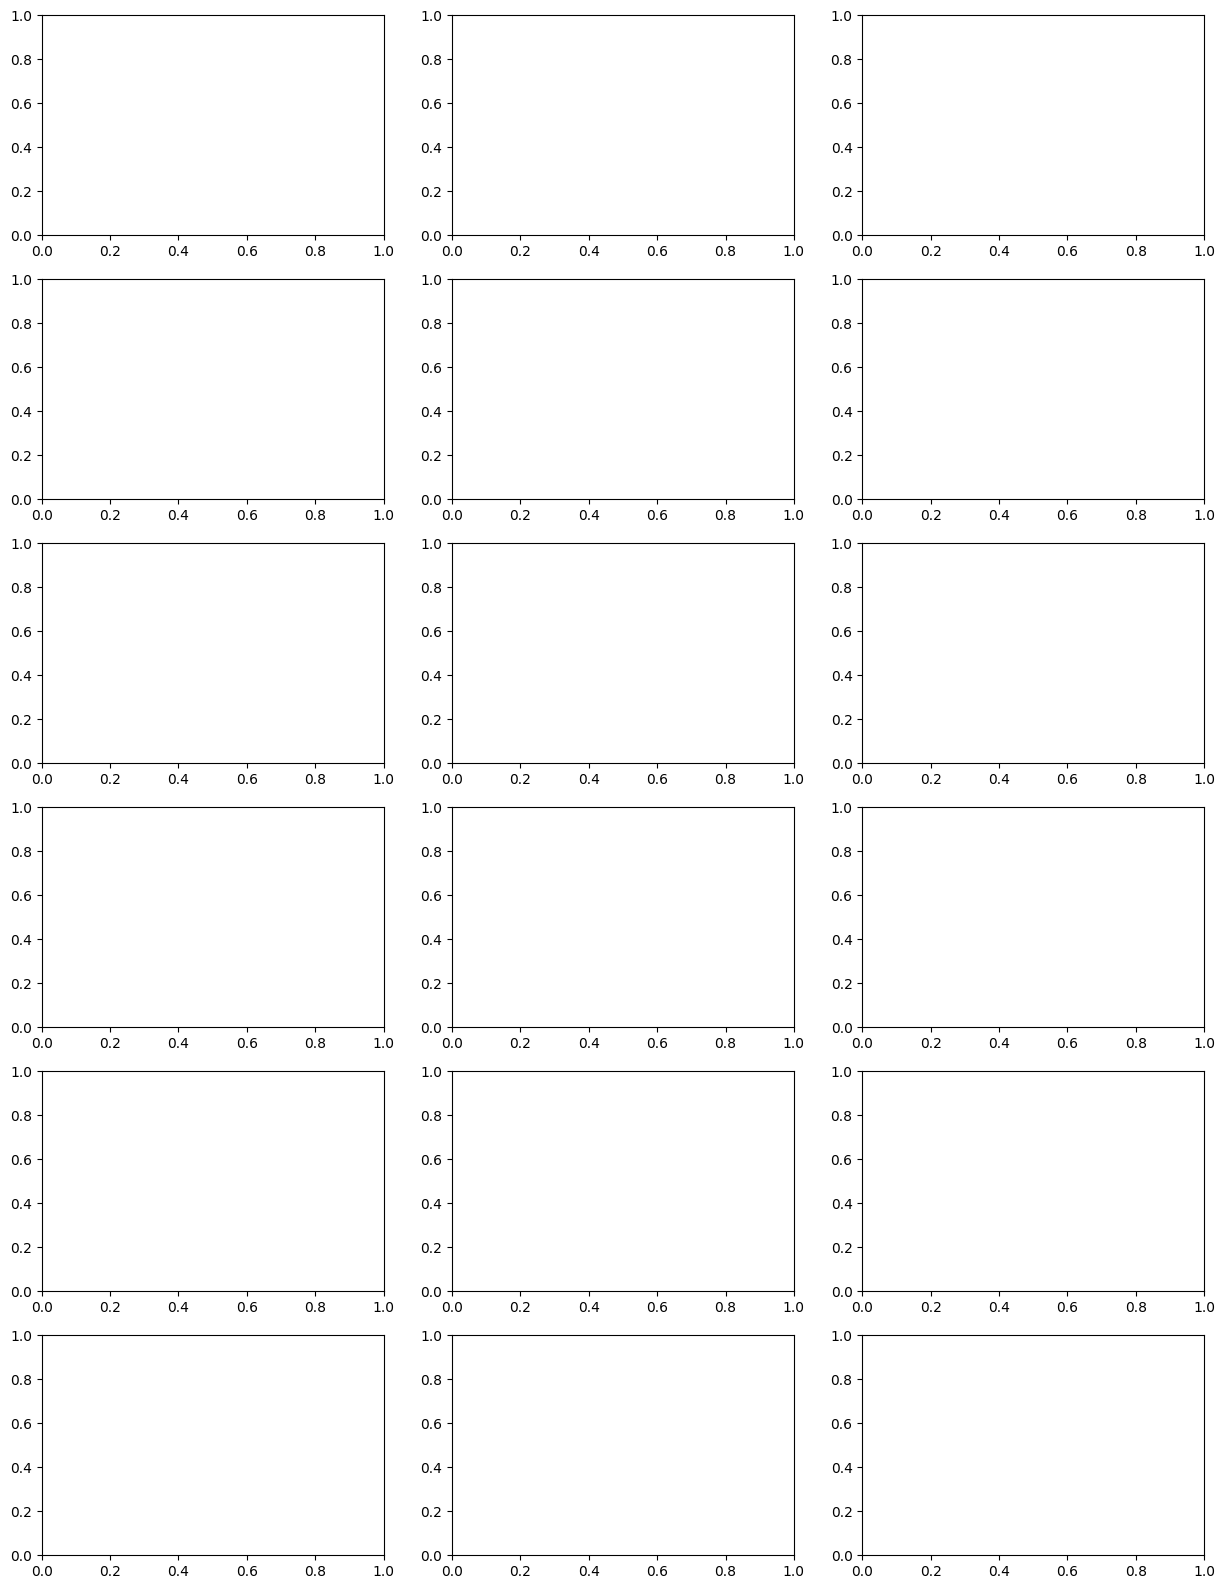

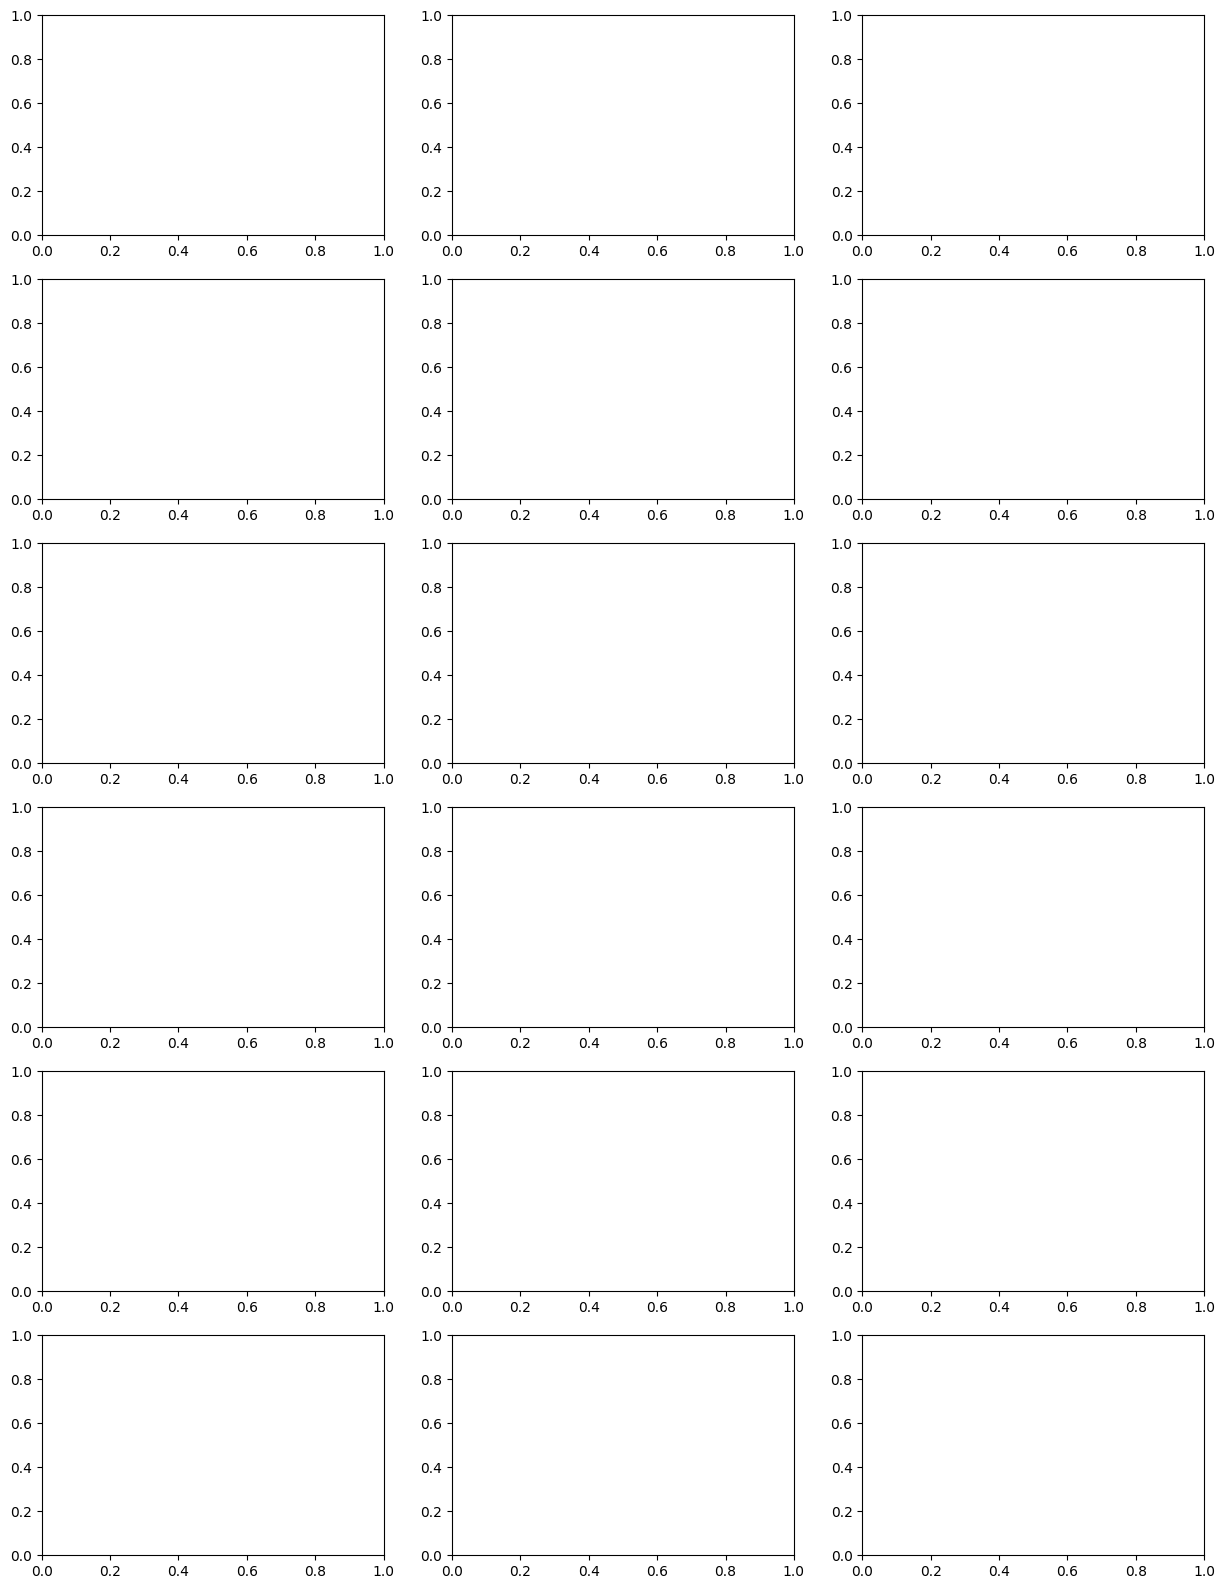

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
import gpt
from sklearn.decomposition import PCA

# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_aug2_zipf_onelayerattention_lr_1e-3_swapmlp_eval/*'
df = defaultdict(list)
folders = glob(f) 
print(len(folders))
def get_sequences(sequences):
    # turn into TensorDataset
    sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences.clone().detach()))
    sequences_loader = torch.utils.data.DataLoader(sequences_ds, batch_size=100, shuffle=False)
    return sequences_loader
df_first_sequences_loader = defaultdict(list)
df_second_sequences_loader = defaultdict(list)
df_first_sequences_loader_post_swap = defaultdict(list)
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    sequences_pkl = folder + '/' + subdir + '_all_sequences.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        with open(sequences_pkl, 'rb') as f:
            sequences = utils.CPU_Unpickler(f).load()
        num_heads = data["args"]["num_heads"]
        num_hidden_features = data["args"]["num_hidden_features"]   
        # count model parameters
        num_parameters = np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in data["model"].items()])
        if num_heads != 18: continue 
        if num_hidden_features != 512: continue 
        first_sequences_loader = get_sequences(sequences['sequences'][0][::10])
        second_sequences_loader = get_sequences(sequences['sequences'][1][::10])
    except Exception as e:
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    print("data keys", data.keys()) 
    print("sequences keys", sequences.keys())
    print("sequences",  ((sequences['sequences'])[0]).shape)
    print("model", data["args"]["lr"], num_heads, num_hidden_features, 
          "len logs", len(data["logs"]), "epochs", (data["logs"][-1]["epoch"]+1)*50)
    
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    len_context = data["args"]["len_context"]
    vocab_size = data["args"]["vocab_size"]
    num_mlp_layers = data["args"]["num_mlp_layers"]
    get_model = lambda: gpt.OneLayerAttention(len_context, 
                                  num_heads, 
                                  num_hidden_features, 
                                  vocab_size, 
                                  num_mlp_layers).to(device)
    model = get_model()
    model.load_state_dict(data["model"])
    model.eval()
    print("Second sequences loader")
    attn_all = []
    for idx, (seqs,) in enumerate(second_sequences_loader):
        
        _, attn = model.get_attention_weights(seqs, idx)
        attn_all.append(attn)
        if idx > 10: break 
    attn_all = torch.cat(attn_all, dim=0)
    print("attn_all", attn_all.shape)
    

In [2]:
attn_all.shape

torch.Size([1200, 18, 100, 100])

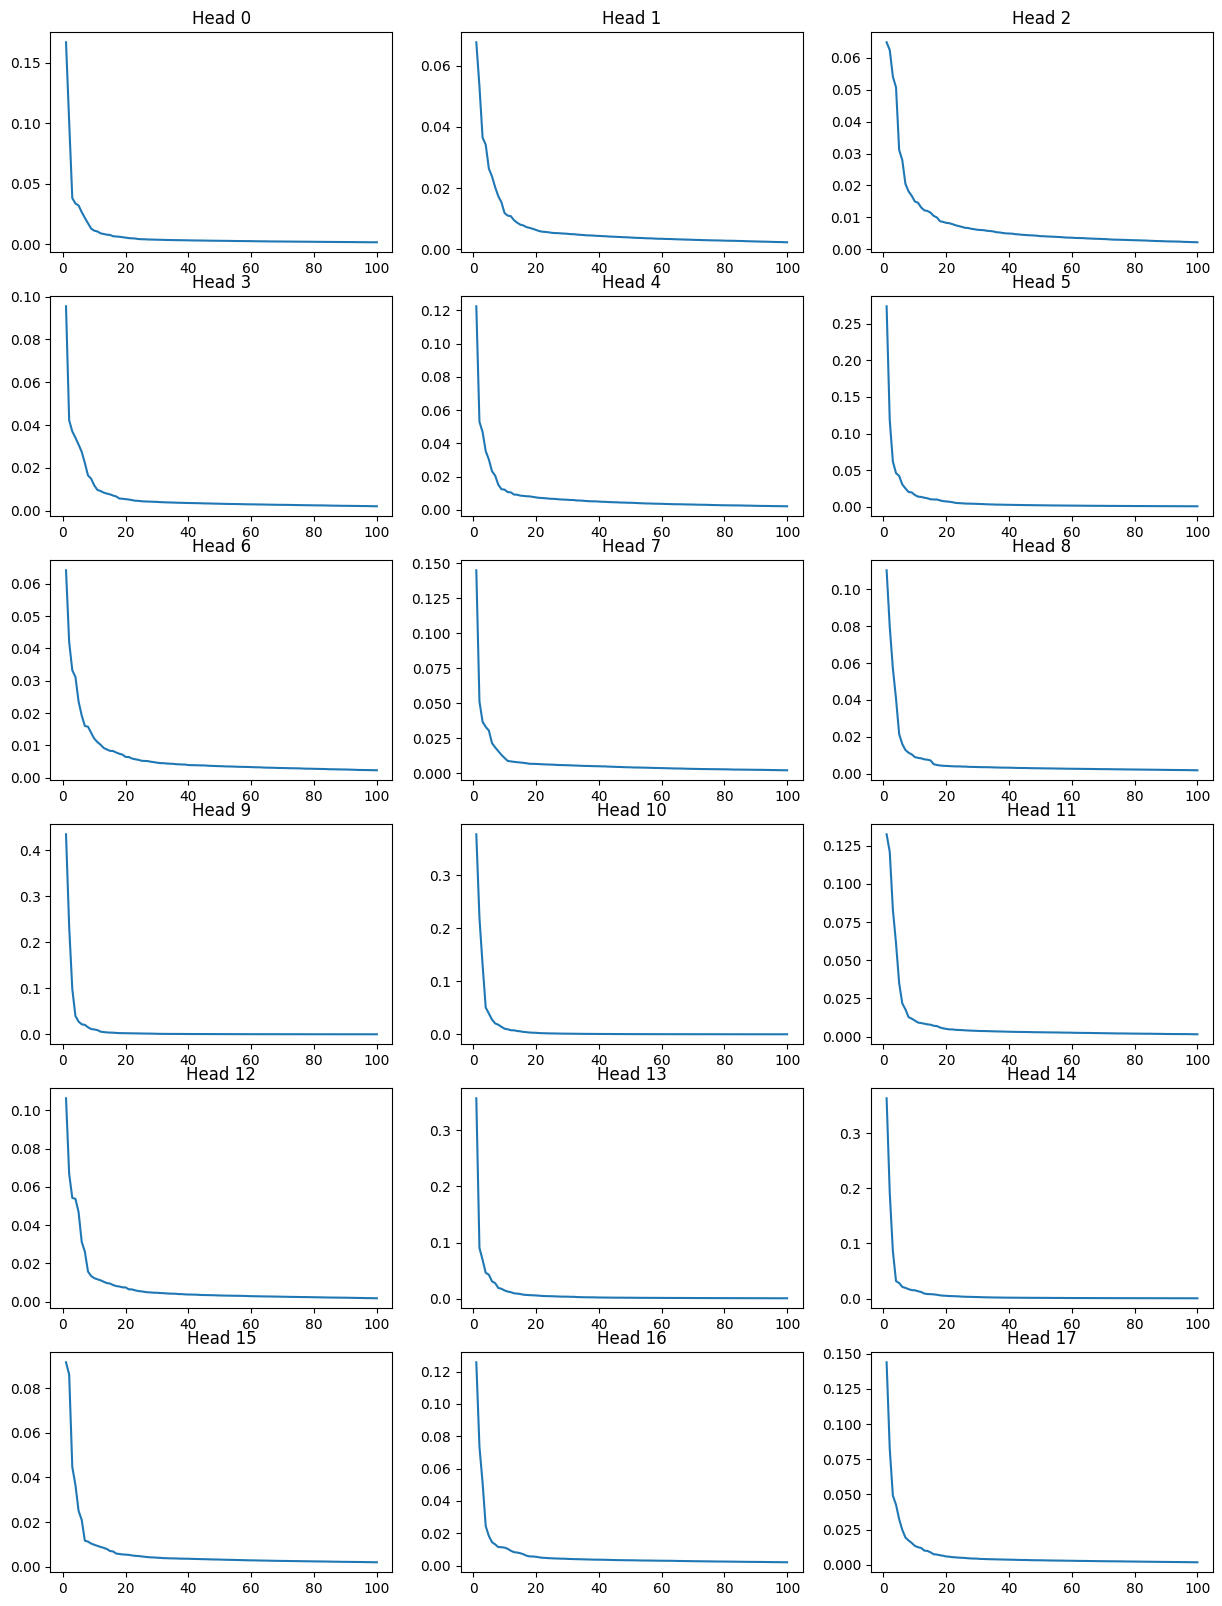

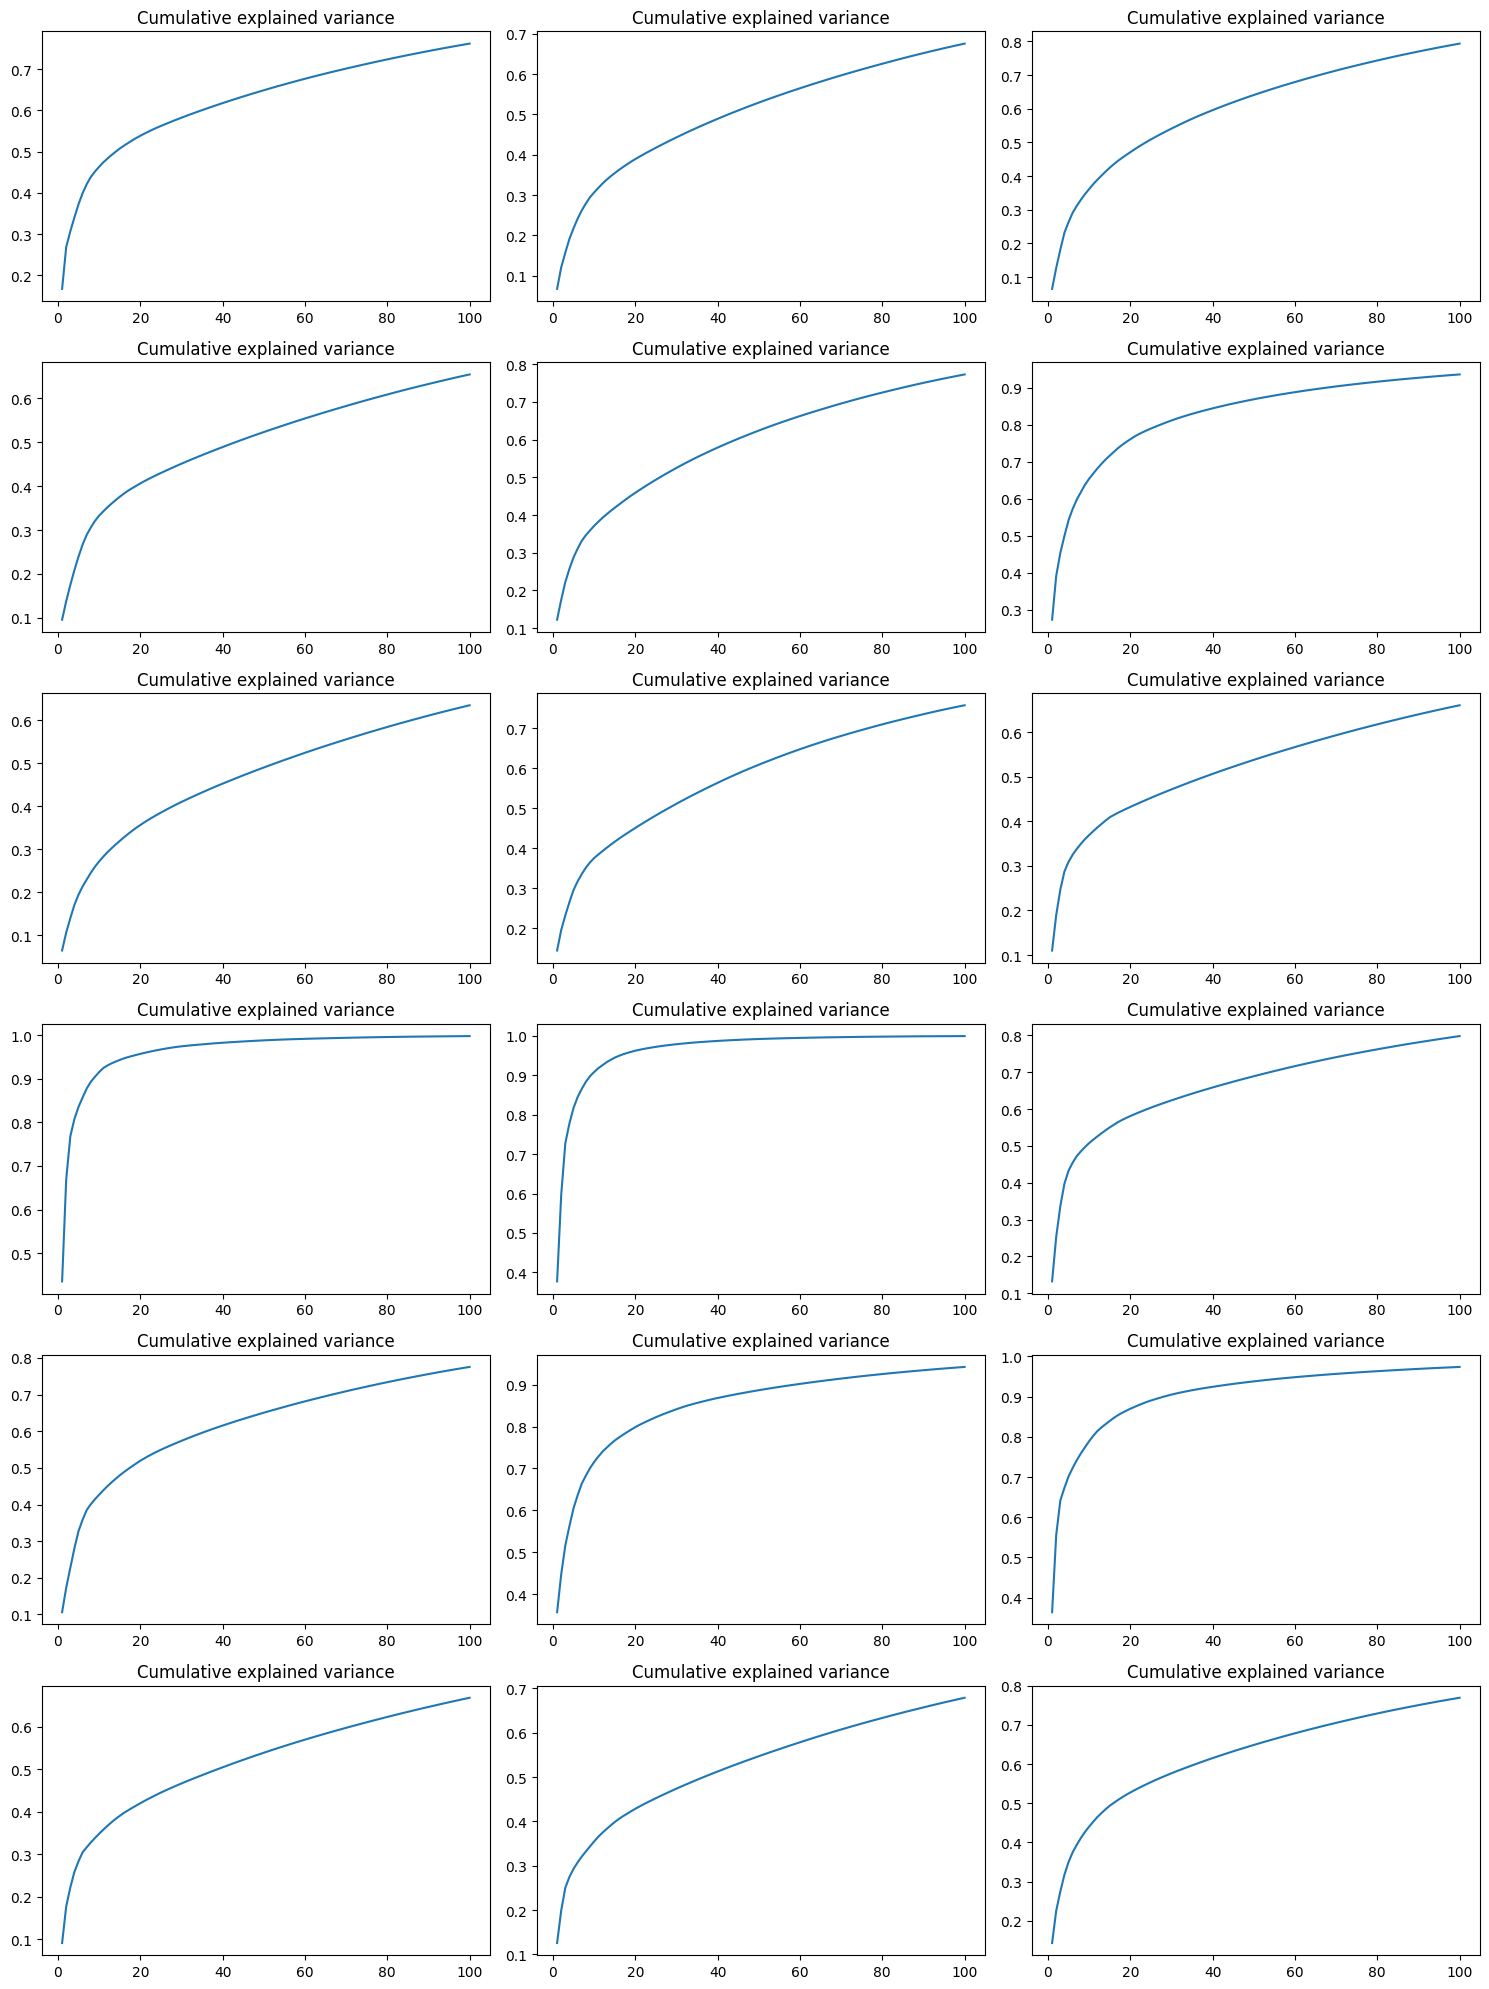

NameError: name 'w' is not defined

In [5]:
# attn has shape torch.Size([100, 18, 100, 100])
# Run PCA on each head
fig, axs = plt.subplots(6, 3, figsize=(15, 20))
fig_cumul, axs_cumul = plt.subplots(6, 3, figsize=(15, 20))
n_components = 100
for head in range(18):
    row = head // 3
    col = head % 3
    pca = PCA(n_components=n_components)
    pca.fit(attn_all[:, head, :, :].flatten(start_dim=1).detach().cpu().numpy())
    # plot scree plot for PCA
    axs[row, col].plot(np.arange(1, n_components+1), pca.explained_variance_ratio_[:n_components])
    axs[row, col].set_title(f'Head {head}')
    axs_cumul[row, col].plot(np.arange(1, n_components+1), np.cumsum(pca.explained_variance_ratio_[:n_components]))
    axs_cumul[row, col].set_title("Cumulative explained variance")
plt.tight_layout()
plt.show()


w

# August 14, 2025

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn

import utils
from collections import defaultdict
from glob import glob
import gpt
from sklearn.decomposition import PCA

# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_aug15_zipf_onelayerattention_lr_1e-3/memo_aug15_zipf_onelayerattention_lr_1e-3_transformer_K_100000_L_100_hidden_64_nheads_18_nlayers_1_1755277655.6742353'
# f = './cache/memo_aug15_zipf_onelayerattention_lr_1e-3/memo_aug15_zipf_onelayerattention_lr_1e-3_transformer_K_100000_L_100_hidden_18_nheads_64_nlayers_1_1755245693.102112'
df = defaultdict(list)
folders = glob(f) 
print(len(folders))
def get_sequences(sequences):
    # turn into TensorDataset
    sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences.clone().detach()))
    sequences_loader = torch.utils.data.DataLoader(sequences_ds, batch_size=100, shuffle=False)
    return sequences_loader
df_first_sequences_loader = defaultdict(list)
df_second_sequences_loader = defaultdict(list)
df_first_sequences_loader_post_swap = defaultdict(list)
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    sequences_pkl = folder + '/' + subdir + '_all_sequences.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        print("data", data.keys())
        with open(sequences_pkl, 'rb') as f:
            sequences = utils.CPU_Unpickler(f).load()
        num_heads = data["args"]["num_heads"]
        num_hidden_features = data["args"]["num_hidden_features"]   
        # count model parameters
    except Exception as e:
        print(e)
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    

/tmp/ipykernel_873267/3275842161.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1
data dict_keys(['args', 'logs', 'mlp_state_dict', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_10', 'model_11', 'model_12', 'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18', 'model_19', 'model_20', 'model_21', 'model_22', 'model_23', 'model_24', 'model_25', 'model_26', 'model_27', 'model_28', 'model_29', 'model_30', 'model_31', 'model_32', 'model_33', 'model_34', 'model_35', 'model_36', 'model_37', 'model_38', 'model_39', 'model_40', 'model_41', 'model_42', 'model_43', 'model_44', 'model_45', 'model_46', 'model_47', 'model_48', 'model_49', 'model_50', 'model_51', 'model_52', 'model_53', 'model_54', 'model_55', 'model_56', 'model_57', 'model_58', 'model_59', 'model_60', 'model_61', 'model_62', 'model_63', 'model_64', 'model_65', 'model_66', 'model_67', 'model_68', 'model_69', 'model_70', 'model_71', 'model_72', 'model_73', 'model_74', 'model_75', 'model_76', 'model_77', 'model_78', 'model_79'

data keys dict_keys(['args', 'logs', 'mlp_state_dict', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_10', 'model_11', 'model_12', 'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18', 'model_19', 'model_20', 'model_21', 'model_22', 'model_23', 'model_24', 'model_25', 'model_26', 'model_27', 'model_28', 'model_29', 'model_30', 'model_31', 'model_32', 'model_33', 'model_34', 'model_35', 'model_36', 'model_37', 'model_38', 'model_39', 'model_40', 'model_41', 'model_42', 'model_43', 'model_44', 'model_45', 'model_46', 'model_47', 'model_48', 'model_49', 'model_50', 'model_51', 'model_52', 'model_53', 'model_54', 'model_55', 'model_56', 'model_57', 'model_58', 'model_59', 'model_60', 'model_61', 'model_62', 'model_63', 'model_64', 'model_65', 'model_66', 'model_67', 'model_68', 'model_69', 'model_70', 'model_71', 'model_72', 'model_73', 'model_74', 'model_75', 'model_76', 'model_77', 'model_78', 'model_

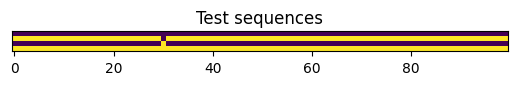

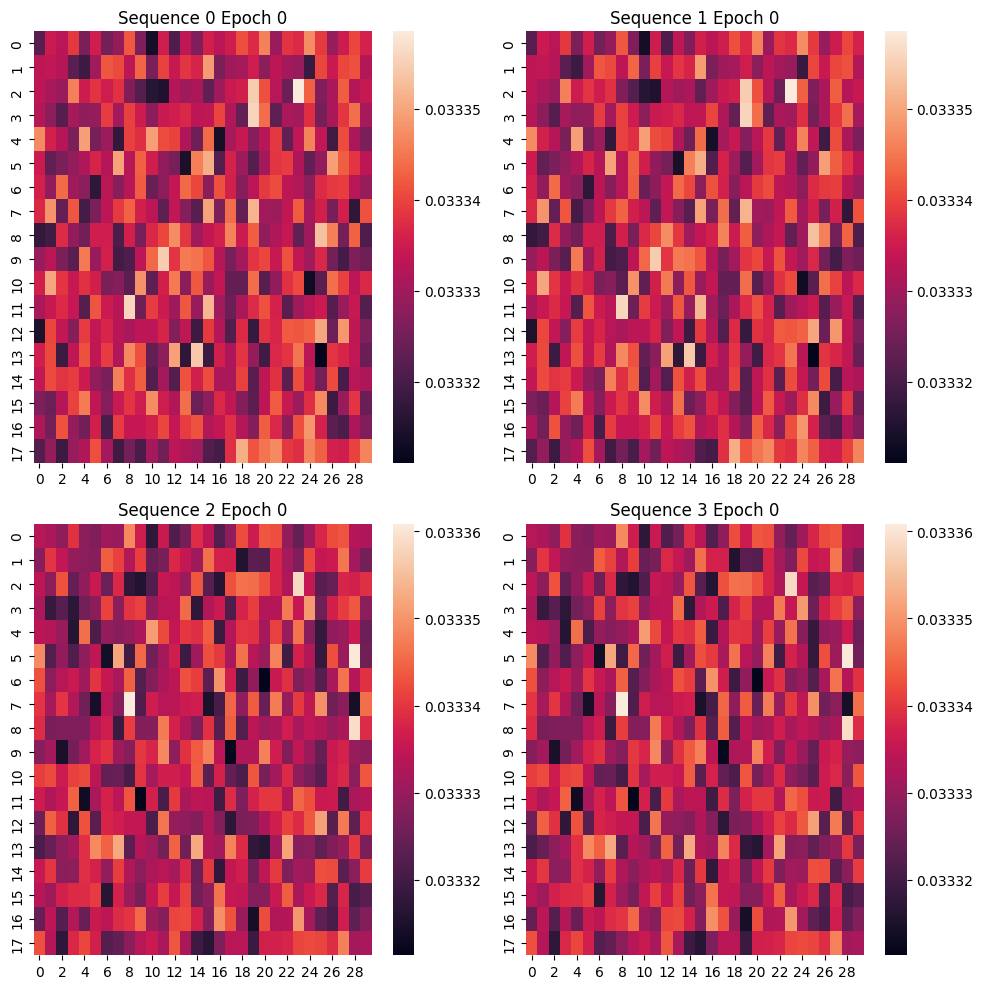

dot_product torch.Size([4, 18, 30])
Special sequences loader


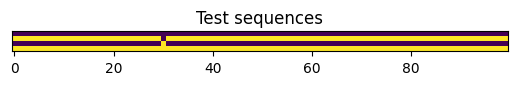

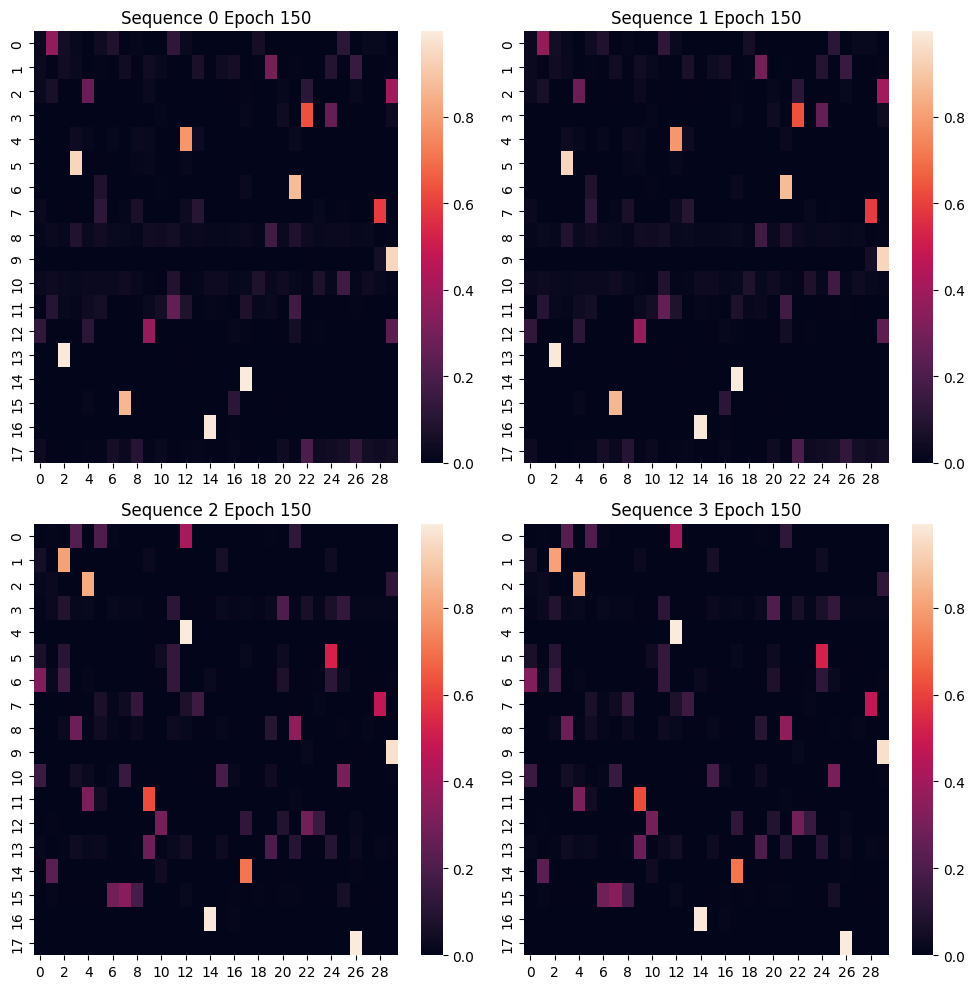

dot_product torch.Size([4, 18, 30])


In [34]:
print("data keys", data.keys()) 
print("model", data["args"]["lr"], num_heads, num_hidden_features, 
        "len logs", len(data["logs"]), "epochs", (data["logs"][-1]["epoch"]+1)*50)

# plot train loss
# fig, axs = plt.subplots(1, 1, figsize=(5, 6))
# num_iters_per_epoch = 1000
# axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
len_context = data["args"]["len_context"]
vocab_size = data["args"]["vocab_size"]
num_mlp_layers = data["args"]["num_mlp_layers"]
get_model = lambda: gpt.OneLayerAttention(len_context, 
                                num_heads, 
                                num_hidden_features, 
                                vocab_size, 
                                num_mlp_layers).to(device)
print("data", data.keys())
# plot train loss
# plt.plot([l["train_loss"] for l in data["logs"]])
# plt.title("Train loss vs. Epochs")
# plt.xlabel("Epochs")
# plt.ylabel("Train loss")
# plt.show()

qkv_dict = defaultdict(list)
for epoch in [0, 150]:
    

    model = get_model()
    model.load_state_dict(data[f"model_{epoch}"])
    model.eval()


    print("Special sequences loader")
    special_sequences = torch.cat([
        torch.zeros(1, len_context, dtype=torch.long),
        torch.ones(1, len_context, dtype=torch.long),
        torch.zeros(1, len_context, dtype=torch.long),
        torch.ones(1, len_context, dtype=torch.long),
    ], dim=0)
    special_sequences[0, 30] = 0
    special_sequences[1, 30] = 0

    special_sequences[2, 30] = 1
    special_sequences[3, 30] = 1
    # plot special sequences

    plt.imshow(special_sequences.detach().cpu().numpy())
    plt.title("Test sequences")
    plt.yticks([])
    plt.show()
    # print("special_sequences", special_sequences.shape)
    attn_all = []
    # _, attn = model.get_attention_weights(special_sequences, 1)
    q, k, v, C = model.get_qkv(special_sequences, 1) # q: torch.Size([4, 18, 100, 512])
    # Compute the (query, key) dot product between positions before 30 and the bit at position 30
    dot_product = torch.softmax(torch.matmul(q[:, :, [30], :], k[:, :, :30, :].transpose(-2, -1)).squeeze(2) / np.sqrt(q.size(-1)), dim=-1)     
    # dot_product = torch.matmul(q[:, :, [30], :], k[:, :, :30, :].transpose(-2, -1)).squeeze(2) 
    # print("q 0 at bit 30", q[0, :, 30, :]) # Batch 0, all heads, 512 features
    # print("q 1 at bit 30", q[1, :, 30, :]) # Batch 1, all heads, 512 features 
    # print("k 0 at bit 20", k[0, :, 20, :].transpose(-2, -1)) # Batch 0, all heads, 512 features
    # print("k 1 at bit 20", k[1, :, 20, :].transpose(-2, -1)) # Batch 1, all heads, 512 features 
    # print("dot_product 0 at bit 30", torch.matmul(q[0, :, [30], :], k[0, :, :30, :].transpose(-2, -1)))
    # print("dot_product 1 at bit 30", torch.matmul(q[1, :, [30], :], k[1, :, :30, :].transpose(-2, -1)))
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    for i in range(4):
        x, y = i // 2, i % 2
        corrcoef = np.corrcoef(dot_product[i].detach().cpu().numpy())
        # sns.heatmap(corrcoef, ax=axs[x, y], vmin=0, vmax=1)
        sns.heatmap(dot_product[i].detach().cpu().numpy(), ax=axs[x, y])
        axs[x, y].set_title(f"Sequence {i} Epoch {epoch}")
    plt.tight_layout()
    plt.show()
            
    print("dot_product", dot_product.shape) 
    
    # compute norm of qs
    q_norm = torch.norm(q.reshape(-1, q.shape[-1]), dim=-1)
    qkv_dict["epoch"].extend([epoch] * len(q_norm))
    qkv_dict["q_norm"].extend(q_norm.detach().cpu().numpy()) 


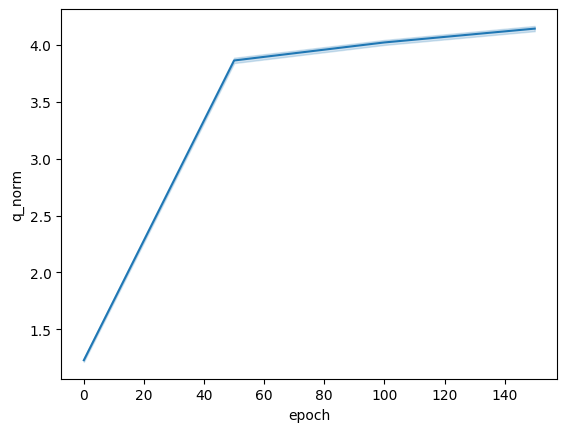

In [14]:
# plot q_norm
qkv_df = pd.DataFrame(qkv_dict)
sns.lineplot(x="epoch", y="q_norm", data=qkv_df)
plt.show()







# Aug 22, 2025
## Decode MLP representations

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn

import utils
from collections import defaultdict
from glob import glob
import gpt
from sklearn.decomposition import PCA

# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_aug15_zipf_onelayerattention_lr_1e-3/memo_aug15_zipf_onelayerattention_lr_1e-3_transformer_K_100000_L_100_hidden_64_nheads_18_nlayers_1_1755277655.6742353'
# f = './cache/memo_aug15_zipf_onelayerattention_lr_1e-3/memo_aug15_zipf_onelayerattention_lr_1e-3_transformer_K_100000_L_100_hidden_18_nheads_64_nlayers_1_1755245693.102112'
df = defaultdict(list)
folders = glob(f) 
print(len(folders))
def get_sequences(sequences, batch_size=100):
    # turn into TensorDataset
    sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences.clone().detach()))
    sequences_loader = torch.utils.data.DataLoader(sequences_ds, batch_size=batch_size, shuffle=False)
    return sequences_loader
df_first_sequences_loader = defaultdict(list)
df_second_sequences_loader = defaultdict(list)
df_first_sequences_loader_post_swap = defaultdict(list)
for folder in folders:
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    sequences_pkl = folder + '/' + subdir + '_all_sequences.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        print("data", data.keys())
        with open(sequences_pkl, 'rb') as f:
            sequences = utils.CPU_Unpickler(f).load()
        num_heads = data["args"]["num_heads"]
        num_hidden_features = data["args"]["num_hidden_features"]   
        # count model parameters
    except Exception as e:
        print(e)
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    

/tmp/ipykernel_1462027/1345042532.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1
data dict_keys(['args', 'logs', 'mlp_state_dict', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_10', 'model_11', 'model_12', 'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18', 'model_19', 'model_20', 'model_21', 'model_22', 'model_23', 'model_24', 'model_25', 'model_26', 'model_27', 'model_28', 'model_29', 'model_30', 'model_31', 'model_32', 'model_33', 'model_34', 'model_35', 'model_36', 'model_37', 'model_38', 'model_39', 'model_40', 'model_41', 'model_42', 'model_43', 'model_44', 'model_45', 'model_46', 'model_47', 'model_48', 'model_49', 'model_50', 'model_51', 'model_52', 'model_53', 'model_54', 'model_55', 'model_56', 'model_57', 'model_58', 'model_59', 'model_60', 'model_61', 'model_62', 'model_63', 'model_64', 'model_65', 'model_66', 'model_67', 'model_68', 'model_69', 'model_70', 'model_71', 'model_72', 'model_73', 'model_74', 'model_75', 'model_76', 'model_77', 'model_78', 'model_79'

In [ ]:
from sklearn.linear_model import LogisticRegression
print("data keys", data.keys()) 
print("model", data["args"]["lr"], num_heads, num_hidden_features, 
        "len logs", len(data["logs"]), "epochs", (data["logs"][-1]["epoch"]+1)*50)

# plot train loss
# fig, axs = plt.subplots(1, 1, figsize=(5, 6))
# num_iters_per_epoch = 1000
# axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
len_context = data["args"]["len_context"]
vocab_size = data["args"]["vocab_size"]
num_mlp_layers = data["args"]["num_mlp_layers"]
get_model = lambda: gpt.OneLayerAttention(len_context, 
                                num_heads, 
                                num_hidden_features, 
                                vocab_size, 
                                num_mlp_layers).to(device)
print("data", data.keys())
# plot train loss
# plt.plot([l["train_loss"] for l in data["logs"]])
# plt.title("Train loss vs. Epochs")
# plt.xlabel("Epochs")
# plt.ylabel("Train loss")
# plt.show()
first_sequences_loader = get_sequences(sequences['sequences'][0][::10], batch_size=500)
mlp_dict = defaultdict(list)
model = get_model()
for epoch in np.concatenate([np.arange(0, 100, 10), [99]]):
    model.load_state_dict(data[f"model_{epoch}"])
    model.eval()
    
    mlp_reps_per_layer = defaultdict(list)
    print("\n\nepoch", epoch)
    for idx, (batch,) in enumerate(first_sequences_loader):
        x, mlp_reps_batch = model.forward_mlp(batch, 1) 
        mlp_reps_per_layer["label"] = torch.arange(idx*len(batch), (idx+1)*len(batch)).unsqueeze(1).repeat(1, len_context).reshape(-1).cpu().numpy()
        print("mlp_reps_per_layer", mlp_reps_per_layer["label"])
        for i in range(len(mlp_reps_batch)):
            print(f"mlp_rep {i} shape", mlp_reps_batch[i].shape) 
            mlp_reps_per_layer[i].append(mlp_reps_batch[i].reshape(-1, mlp_reps_batch[i].shape[-1]).detach().cpu().numpy())
        break 
    
    # for each layer, fit a linear model to the mlp_reps predicting the labels
    for i in range(data["args"]["num_mlp_layers"]):
        mlp_reps_per_layer[i] = np.concatenate(mlp_reps_per_layer[i], axis=0)
        # random partition into tr ain and test 
        train_ids = np.random.choice(np.arange(mlp_reps_per_layer[i].shape[0]), size=int(0.8*mlp_reps_per_layer[i].shape[0]), replace=False)
        test_ids = np.setdiff1d(np.arange(mlp_reps_per_layer[i].shape[0]), train_ids)
        train_mlp_reps = mlp_reps_per_layer[i][train_ids]
        test_mlp_reps = mlp_reps_per_layer[i][test_ids]
        train_labels = mlp_reps_per_layer["label"][train_ids]
        test_labels = mlp_reps_per_layer["label"][test_ids]
        
        print(f"mlp_rep {i} shape", mlp_reps_per_layer[i].shape)  
        # fit a logistic regression model to the mlp_reps predicting the labels
        logisticregression = LogisticRegression(max_iter=1000)
        logisticregression.fit(train_mlp_reps, train_labels)
        mlp_dict["test_labels"].extend(mlp_reps_per_layer["label"][test_ids]) 
        test_preds = logisticregression.predict(test_mlp_reps)
        mlp_dict["accuracy"].extend(test_preds == test_labels)
        mlp_dict["layer"].extend([i] * len(test_ids))
        mlp_dict["epoch"].extend([epoch] * len(test_ids))
        print("test_accuracy", logisticregression.score(test_mlp_reps, test_labels), "test_labels", test_labels, "test_mlp_reps", test_preds)


data keys dict_keys(['args', 'logs', 'mlp_state_dict', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_10', 'model_11', 'model_12', 'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18', 'model_19', 'model_20', 'model_21', 'model_22', 'model_23', 'model_24', 'model_25', 'model_26', 'model_27', 'model_28', 'model_29', 'model_30', 'model_31', 'model_32', 'model_33', 'model_34', 'model_35', 'model_36', 'model_37', 'model_38', 'model_39', 'model_40', 'model_41', 'model_42', 'model_43', 'model_44', 'model_45', 'model_46', 'model_47', 'model_48', 'model_49', 'model_50', 'model_51', 'model_52', 'model_53', 'model_54', 'model_55', 'model_56', 'model_57', 'model_58', 'model_59', 'model_60', 'model_61', 'model_62', 'model_63', 'model_64', 'model_65', 'model_66', 'model_67', 'model_68', 'model_69', 'model_70', 'model_71', 'model_72', 'model_73', 'model_74', 'model_75', 'model_76', 'model_77', 'model_78', 'model_

/tmp/ipykernel_1462027/1345042532.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sequences_ds = torch.utils.data.TensorDataset(torch.tensor(sequences.clone().detach()))


mlp_reps_per_layer [  0   0   0 ... 499 499 499]
mlp_rep 0 shape torch.Size([500, 100, 1152])
mlp_rep 1 shape torch.Size([500, 100, 1152])
mlp_rep 2 shape torch.Size([500, 100, 1152])
mlp_rep 0 shape (50000, 1152)
test_accuracy 0.0013 test_labels [  0   0   0 ... 499 499 499] test_mlp_reps [243 381 487 ... 177 492 303]
mlp_rep 1 shape (50000, 1152)


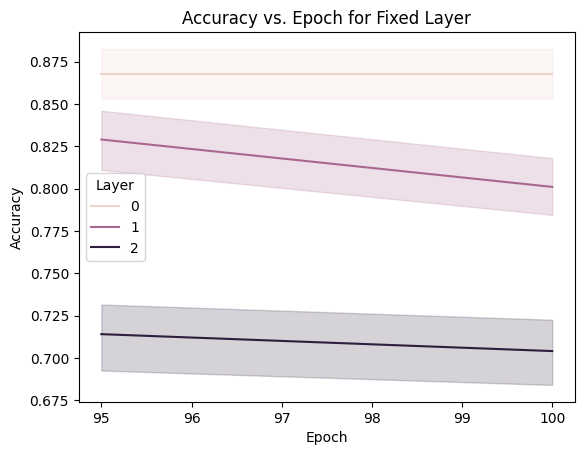

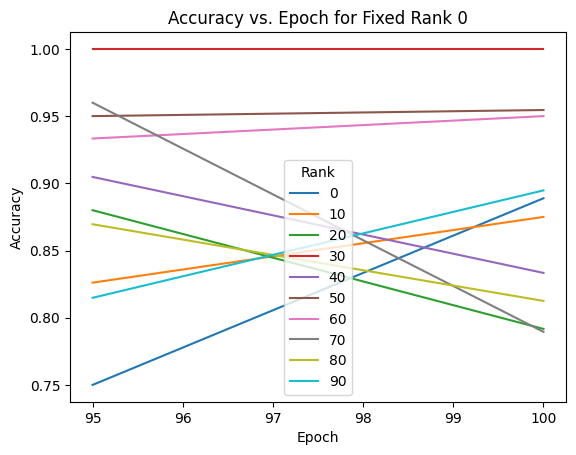

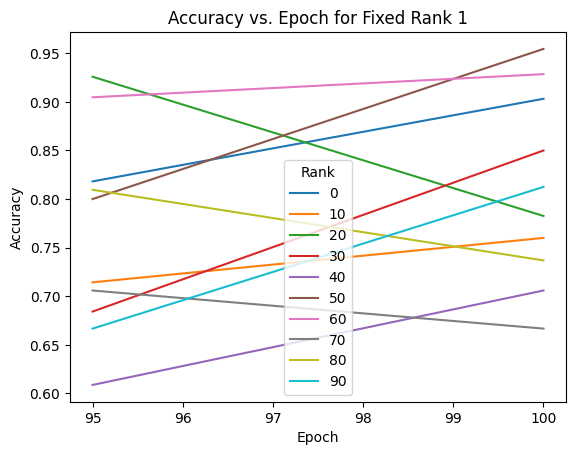

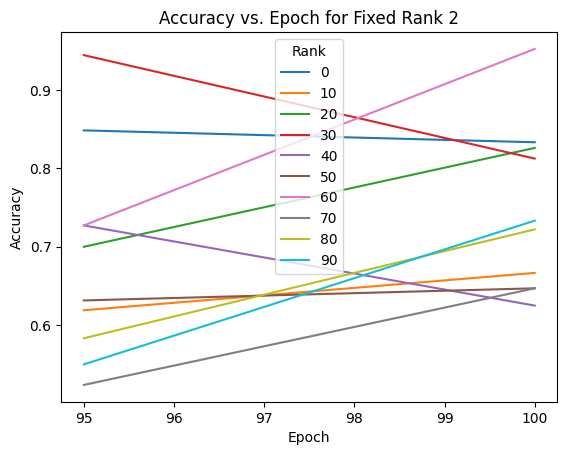

In [30]:
df = pd.DataFrame(mlp_dict)
# plot accuracy vs. epoch for fixed layer
sns.lineplot(x="epoch", y="accuracy", hue="layer", data=df)
plt.title("Accuracy vs. Epoch for Fixed Layer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Layer")
plt.show()

# plot accuracy vs. epoch for fixed rank
for layer in df["layer"].unique():
    _df = df[df["layer"] == layer]
    _df = _df[_df["test_labels"] % 10 == 0]
    sns.lineplot(x="epoch", y="accuracy", hue="test_labels", data=_df, errorbar=None, palette="tab10")
    plt.title(f"Accuracy vs. Epoch for Fixed Rank {layer}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(title="Rank")
    plt.show()
